<a href="https://colab.research.google.com/github/kolattukudy/examples/blob/master/kollective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install faker

In [79]:
import pandas as pd
from tqdm import tqdm
import csv
import random
import string
from faker import Faker



In [80]:


fake = Faker()


In [82]:
import numpy
nums = numpy.random.choice([0, 1], size=10, p=[.8, .2])

nums

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [83]:
print 
no_src_id =15

src_ids=numpy.random.choice(10, no_src_id, replace=True)
src_ids

array([6, 8, 6, 0, 9, 4, 3, 0, 5, 2, 0, 0, 2, 9, 1])


  •	t : timestamp		(the time of the transfer)
	•	type : [origin|peer]	(whether the transfer was from a peer or from origin)
	•	size: int4		(the size, in bytes, of the downloaded content)
	•	duration : int4	(the duration in milliseconds that it took for the transfer to complete)
	•	source_id: string	(for peer transfers, a UUID for the peer/coworker.  Null for origin transfers)
	•	dest_id: string	(a UUID for the viewer who is downloading the video stream)



 

In [81]:
import faker
import typing as tp
import numpy

class Transfer:
    def __init__(
        self,
        t: tp.Optional[int] = None,
        type: tp.Optional[str]  = None,
        source_id: tp.Optional[str] = None,
        size: int = 1,
        duration: tp.Optional[int] = None,
        dest_id: tp.Optional[str] = None,
    ):
        self.t = t
        self.type= type
        self.source_id = source_id
        self.size = size
        self.duration = duration
        self.dest_id = dest_id

    def to_dict(self) -> dict:
        return {
            "t" : self.t,
            "type": self.type,

            "source_id": self.source_id,
            "size":self.size,
            "duration": self.duration,
            "dest_id": self.dest_id,
        }

transfers = tqdm([Transfer() for i in range(10)] )
transfers_list =[]
nums = numpy.random.choice([0, 1], size=10, p=[.8, .2])
no_src_id =2
src_ids=numpy.random.choice(10, no_src_id, replace=True)
for idx,t in enumerate(transfers):
  type_val = 'peer' if nums[idx] == 0 else 'origin'

  source_id = random.choice(src_ids)if type_val=='peer'  else ''

  if type_val == 'peer':
    t.duration = random.randrange(0.5*100, 1*100, 2)
  else:
    t.duration = random.randrange(3*100, 4*100, 2)

   
  t.t = fake.date_time_between(start_date='-1m', end_date='now')
  t.type = type_val
  t.dest_id = fake.uuid4()
  t.size = random.randrange(1*1024, 10*1024, 2)
  t.source_id = source_id
  transfers_list.append(t)

transfer_dicts = [transfer.to_dict() for transfer in transfers_list]
df = pd.DataFrame(transfer_dicts)
df


100%|██████████| 10/10 [00:00<00:00, 3302.34it/s]


,t,type,source_id,size,duration,dest_id
0,2021-07-14 14:54:15,peer,2,6320,64,cee94bf0-a12d-4e2b-8e07-ed1b2bf0ad8a
1,2021-07-14 14:55:07,peer,5,8966,74,af3391bc-3c64-4da0-9e59-5db292bb660b
2,2021-07-14 14:55:04,peer,5,6062,68,17bd4e1d-e14c-455b-8846-508cfc357312
3,2021-07-14 14:54:35,peer,2,7052,86,7e7d86a1-6c09-4fff-94cf-06340a5cad6d
4,2021-07-14 14:54:46,origin,,3304,346,1136388a-24e1-46c5-a8f7-f96aa7a3ee0b
5,2021-07-14 14:54:27,origin,,3982,398,c475ce64-7736-4265-bbf9-c0c0b9a24feb
6,2021-07-14 14:54:17,peer,5,9854,98,beb1fe1f-f2b3-45a6-9e36-ab4aede01ed2
7,2021-07-14 14:54:50,peer,2,2606,58,f20b4b5c-b46a-4e9c-99fc-8f841b6e4f87
8,2021-07-14 14:54:35,peer,2,9452,94,d95ad9e9-e222-49dc-afa2-a5f597368571
9,2021-07-14 14:54:24,origin,,7448,374,de7bc5fc-24da-46d6-965d-bc40b4fbcf2b


In [147]:
df['percentage'] = (df[df['type']== 'peer']['size'] / df['size'].sum()) * 100
df.head(5)

,t,type,source_id,size,duration,dest_id,percentage
0,2021-07-14 14:54:15,peer,2,6320,64,cee94bf0-a12d-4e2b-8e07-ed1b2bf0ad8a,9.716201
1,2021-07-14 14:55:07,peer,5,8966,74,af3391bc-3c64-4da0-9e59-5db292bb660b,13.784091
2,2021-07-14 14:55:04,peer,5,6062,68,17bd4e1d-e14c-455b-8846-508cfc357312,9.319558
3,2021-07-14 14:54:35,peer,2,7052,86,7e7d86a1-6c09-4fff-94cf-06340a5cad6d,10.841558
4,2021-07-14 14:54:46,origin,,3304,346,1136388a-24e1-46c5-a8f7-f96aa7a3ee0b,NaN


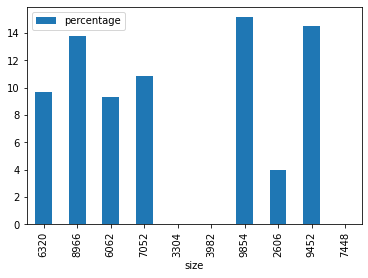

In [146]:
#How much bandwidth was saved for the customer?  (peer bytes / total bytes)

df.plot(kind='bar', x='size', y='percentage');


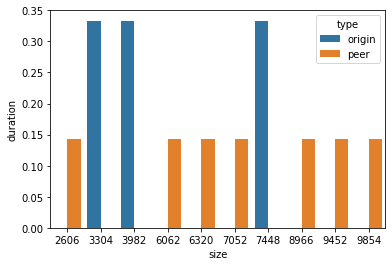

In [103]:
#How did transfer durations between peer and origin compare?
import pandas as pd
import seaborn as sns


x, y, hue = "size", "duration", "type"
hue_order = ["peer", "origin"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue));

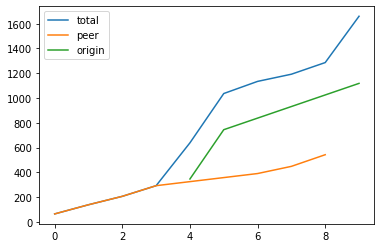

In [143]:
#How much bandwidth was consumed over time (Mbps)?

fig, ax = plt.subplots()
df['duration'].cumsum().plot( kind="line")
df[df['type']== 'peer']['duration'].cumsum().plot(kind="line")
df[df['type']== 'origin']['duration'].cumsum().plot(kind='line')
ax.legend(["total", "peer","origin"]);